In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical
from process import *
from sklearn.preprocessing import LabelBinarizer
import h5py
from keras.utils import np_utils, to_categorical
from keras.models import model_from_json
import csv

/home/constant/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

# all_seasons.append(season)
except csv.Error:
    print('null byte')
data = pd.DataFrame(np.array(season))

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,2.4,3.3,3.25
2,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,2,3.3,4.5
3,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,3.2,3.4,2.4
4,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,4.5,3.6,1.91
5,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,1.25,6.5,15
6,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,14,9,6,3,5,0,0,2.38,3.2,3.4
7,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,12,6,2,1,2,0,1,1.8,3.75,5
8,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,17,5,4,3,3,0,0,2.4,3.5,3.1
9,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,10,4,2,0,1,0,0,4.75,3.6,1.85


In [4]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        record = np.empty(15, dtype=object)
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            if row[2] == 'Liverpool':
                record[1] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
            
            if row[9] == 'A':
                record[4] = 0
            elif row[9] == 'B':
                record[4] = 1
            else:
                record[4] = 2
                
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            record[14] = row[6] # full time results
            
            fixtures.append(record)
            
            
    x += 10
    size += 10

fixtures = pd.DataFrame(fixtures)
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [6]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,08,0,1,1,2,2.4,3.5,3.1,3,4,5,4,3,3,A
1,08,0,2,0,2,6.5,4.2,1.57,2,0,1,12,0,1,H
2,08,0,0,1,0,2.38,3.4,3,1,1,5,5,3,5,D
3,09,1,2,1,2,1.7,4,5.5,4,1,1,7,1,2,H
4,09,0,0,2,0,2.25,3.5,3.4,1,2,6,4,1,1,A
5,09,1,3,0,2,1.22,7,15,5,1,13,2,1,2,H
6,10,0,1,0,2,8,4.75,1.45,1,2,3,10,2,2,A
7,10,1,0,0,2,2.2,3.5,3.5,0,0,3,1,0,4,D
8,10,1,2,0,2,1.29,6,13,2,1,3,2,1,3,H
9,10,0,2,3,0,5.25,4,1.7,2,4,3,3,1,2,A


In [ ]:
#model without half time statistics

In [224]:
X = fixtures[[0,1,4,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_without_halftime = X.ix[600:,]
Ytest_without_halftime = to_categorical(Y.ix[600:,], num_classes=7)

/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [225]:
without_half_time_details_model = Sequential()
without_half_time_details_model.add(Dense(500, input_dim=5, activation='relu'))
without_half_time_details_model.add(Dense(600, activation='relu'))
without_half_time_details_model.add(Dense(500, activation='sigmoid'))
without_half_time_details_model.add(Dense(7, activation='softmax'))
without_half_time_details_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [226]:
without_half_time_details_history = without_half_time_details_model.fit(Xtrain, Ytrain, epochs=2500, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/2500
 - 2s - loss: 2.1025 - acc: 0.2286 - val_loss: 1.9930 - val_acc: 0.2431
Epoch 2/2500
 - 0s - loss: 1.9779 - acc: 0.2286 - val_loss: 1.8848 - val_acc: 0.2431
Epoch 3/2500
 - 0s - loss: 1.8815 - acc: 0.2286 - val_loss: 1.8021 - val_acc: 0.2431
Epoch 4/2500
 - 0s - loss: 1.8092 - acc: 0.2286 - val_loss: 1.7404 - val_acc: 0.2431
Epoch 5/2500
 - 0s - loss: 1.7568 - acc: 0.2286 - val_loss: 1.6952 - val_acc: 0.2431
Epoch 6/2500
 - 0s - loss: 1.7195 - acc: 0.2286 - val_loss: 1.6625 - val_acc: 0.2376
Epoch 7/2500
 - 0s - loss: 1.6934 - acc: 0.2333 - val_loss: 1.6387 - val_acc: 0.2762
Epoch 8/2500
 - 0s - loss: 1.6752 - acc: 0.2452 - val_loss: 1.6214 - val_acc: 0.2486
Epoch 9/2500
 - 0s - loss: 1.6623 - acc: 0.2643 - val_loss: 1.6084 - val_acc: 0.2652
Epoch 10/2500
 - 0s - loss: 1.6529 - acc: 0.2833 - val_loss: 1.5984 - val_acc: 0.2762
Epoch 11/2500
 - 0s - loss: 1.6459 - acc: 0.2643 - val_loss: 1.5906 - val_acc: 0.2818
Epoch 12/2500
 - 

Epoch 96/2500
 - 0s - loss: 1.5995 - acc: 0.2786 - val_loss: 1.5325 - val_acc: 0.3149
Epoch 97/2500
 - 0s - loss: 1.5994 - acc: 0.2786 - val_loss: 1.5324 - val_acc: 0.3149
Epoch 98/2500
 - 0s - loss: 1.5993 - acc: 0.2786 - val_loss: 1.5323 - val_acc: 0.3149
Epoch 99/2500
 - 0s - loss: 1.5993 - acc: 0.2786 - val_loss: 1.5322 - val_acc: 0.3149
Epoch 100/2500
 - 0s - loss: 1.5992 - acc: 0.2786 - val_loss: 1.5322 - val_acc: 0.3149
Epoch 101/2500
 - 0s - loss: 1.5991 - acc: 0.2786 - val_loss: 1.5321 - val_acc: 0.3149
Epoch 102/2500
 - 0s - loss: 1.5991 - acc: 0.2786 - val_loss: 1.5320 - val_acc: 0.3149
Epoch 103/2500
 - 0s - loss: 1.5990 - acc: 0.2786 - val_loss: 1.5320 - val_acc: 0.3149
Epoch 104/2500
 - 0s - loss: 1.5989 - acc: 0.2786 - val_loss: 1.5319 - val_acc: 0.3149
Epoch 105/2500
 - 0s - loss: 1.5989 - acc: 0.2786 - val_loss: 1.5318 - val_acc: 0.3149
Epoch 106/2500
 - 0s - loss: 1.5988 - acc: 0.2786 - val_loss: 1.5318 - val_acc: 0.3149
Epoch 107/2500
 - 0s - loss: 1.5987 - acc: 0.27

Epoch 191/2500
 - 0s - loss: 1.5940 - acc: 0.2929 - val_loss: 1.5277 - val_acc: 0.3094
Epoch 192/2500
 - 0s - loss: 1.5939 - acc: 0.2929 - val_loss: 1.5277 - val_acc: 0.3094
Epoch 193/2500
 - 0s - loss: 1.5939 - acc: 0.2952 - val_loss: 1.5276 - val_acc: 0.3149
Epoch 194/2500
 - 0s - loss: 1.5938 - acc: 0.2952 - val_loss: 1.5276 - val_acc: 0.3149
Epoch 195/2500
 - 0s - loss: 1.5938 - acc: 0.2952 - val_loss: 1.5276 - val_acc: 0.3149
Epoch 196/2500
 - 0s - loss: 1.5937 - acc: 0.2952 - val_loss: 1.5275 - val_acc: 0.3149
Epoch 197/2500
 - 0s - loss: 1.5937 - acc: 0.2952 - val_loss: 1.5275 - val_acc: 0.3149
Epoch 198/2500
 - 0s - loss: 1.5936 - acc: 0.2952 - val_loss: 1.5274 - val_acc: 0.3149
Epoch 199/2500
 - 0s - loss: 1.5936 - acc: 0.2952 - val_loss: 1.5274 - val_acc: 0.3149
Epoch 200/2500
 - 0s - loss: 1.5935 - acc: 0.2952 - val_loss: 1.5274 - val_acc: 0.3149
Epoch 201/2500
 - 0s - loss: 1.5935 - acc: 0.2952 - val_loss: 1.5273 - val_acc: 0.3149
Epoch 202/2500
 - 0s - loss: 1.5934 - acc: 

 - 0s - loss: 1.5891 - acc: 0.2929 - val_loss: 1.5242 - val_acc: 0.3094
Epoch 286/2500
 - 0s - loss: 1.5891 - acc: 0.2929 - val_loss: 1.5241 - val_acc: 0.3094
Epoch 287/2500
 - 0s - loss: 1.5890 - acc: 0.2929 - val_loss: 1.5241 - val_acc: 0.3094
Epoch 288/2500
 - 0s - loss: 1.5890 - acc: 0.2929 - val_loss: 1.5240 - val_acc: 0.3094
Epoch 289/2500
 - 0s - loss: 1.5889 - acc: 0.2929 - val_loss: 1.5240 - val_acc: 0.3094
Epoch 290/2500
 - 0s - loss: 1.5889 - acc: 0.2929 - val_loss: 1.5240 - val_acc: 0.3094
Epoch 291/2500
 - 0s - loss: 1.5888 - acc: 0.2929 - val_loss: 1.5239 - val_acc: 0.3094
Epoch 292/2500
 - 0s - loss: 1.5888 - acc: 0.2929 - val_loss: 1.5239 - val_acc: 0.3094
Epoch 293/2500
 - 0s - loss: 1.5887 - acc: 0.2929 - val_loss: 1.5239 - val_acc: 0.3094
Epoch 294/2500
 - 0s - loss: 1.5887 - acc: 0.2952 - val_loss: 1.5238 - val_acc: 0.3094
Epoch 295/2500
 - 0s - loss: 1.5886 - acc: 0.2976 - val_loss: 1.5238 - val_acc: 0.3094
Epoch 296/2500
 - 0s - loss: 1.5886 - acc: 0.2976 - val_lo

Epoch 380/2500
 - 0s - loss: 1.5843 - acc: 0.3333 - val_loss: 1.5206 - val_acc: 0.2928
Epoch 381/2500
 - 0s - loss: 1.5842 - acc: 0.3381 - val_loss: 1.5206 - val_acc: 0.2928
Epoch 382/2500
 - 0s - loss: 1.5842 - acc: 0.3381 - val_loss: 1.5206 - val_acc: 0.2928
Epoch 383/2500
 - 0s - loss: 1.5841 - acc: 0.3381 - val_loss: 1.5205 - val_acc: 0.2928
Epoch 384/2500
 - 0s - loss: 1.5841 - acc: 0.3381 - val_loss: 1.5205 - val_acc: 0.2928
Epoch 385/2500
 - 0s - loss: 1.5840 - acc: 0.3381 - val_loss: 1.5205 - val_acc: 0.2873
Epoch 386/2500
 - 0s - loss: 1.5840 - acc: 0.3381 - val_loss: 1.5204 - val_acc: 0.2873
Epoch 387/2500
 - 0s - loss: 1.5839 - acc: 0.3381 - val_loss: 1.5204 - val_acc: 0.2928
Epoch 388/2500
 - 0s - loss: 1.5839 - acc: 0.3381 - val_loss: 1.5203 - val_acc: 0.2928
Epoch 389/2500
 - 0s - loss: 1.5838 - acc: 0.3381 - val_loss: 1.5203 - val_acc: 0.2928
Epoch 390/2500
 - 0s - loss: 1.5838 - acc: 0.3381 - val_loss: 1.5203 - val_acc: 0.2983
Epoch 391/2500
 - 0s - loss: 1.5837 - acc: 

 - 0s - loss: 1.5794 - acc: 0.3405 - val_loss: 1.5171 - val_acc: 0.3149
Epoch 475/2500
 - 0s - loss: 1.5794 - acc: 0.3429 - val_loss: 1.5171 - val_acc: 0.3149
Epoch 476/2500
 - 0s - loss: 1.5793 - acc: 0.3429 - val_loss: 1.5170 - val_acc: 0.3149
Epoch 477/2500
 - 0s - loss: 1.5793 - acc: 0.3429 - val_loss: 1.5170 - val_acc: 0.3094
Epoch 478/2500
 - 0s - loss: 1.5792 - acc: 0.3429 - val_loss: 1.5169 - val_acc: 0.3149
Epoch 479/2500
 - 0s - loss: 1.5792 - acc: 0.3405 - val_loss: 1.5169 - val_acc: 0.3149
Epoch 480/2500
 - 0s - loss: 1.5791 - acc: 0.3405 - val_loss: 1.5169 - val_acc: 0.3149
Epoch 481/2500
 - 0s - loss: 1.5791 - acc: 0.3405 - val_loss: 1.5168 - val_acc: 0.3149
Epoch 482/2500
 - 0s - loss: 1.5790 - acc: 0.3405 - val_loss: 1.5168 - val_acc: 0.3149
Epoch 483/2500
 - 0s - loss: 1.5790 - acc: 0.3405 - val_loss: 1.5168 - val_acc: 0.3149
Epoch 484/2500
 - 0s - loss: 1.5789 - acc: 0.3381 - val_loss: 1.5167 - val_acc: 0.3149
Epoch 485/2500
 - 0s - loss: 1.5789 - acc: 0.3381 - val_lo

Epoch 569/2500
 - 0s - loss: 1.5745 - acc: 0.3524 - val_loss: 1.5134 - val_acc: 0.3149
Epoch 570/2500
 - 0s - loss: 1.5744 - acc: 0.3524 - val_loss: 1.5134 - val_acc: 0.3149
Epoch 571/2500
 - 0s - loss: 1.5744 - acc: 0.3524 - val_loss: 1.5133 - val_acc: 0.3149
Epoch 572/2500
 - 0s - loss: 1.5743 - acc: 0.3524 - val_loss: 1.5133 - val_acc: 0.3149
Epoch 573/2500
 - 0s - loss: 1.5742 - acc: 0.3524 - val_loss: 1.5132 - val_acc: 0.3149
Epoch 574/2500
 - 0s - loss: 1.5742 - acc: 0.3524 - val_loss: 1.5132 - val_acc: 0.3149
Epoch 575/2500
 - 0s - loss: 1.5741 - acc: 0.3500 - val_loss: 1.5132 - val_acc: 0.3149
Epoch 576/2500
 - 0s - loss: 1.5741 - acc: 0.3548 - val_loss: 1.5131 - val_acc: 0.3149
Epoch 577/2500
 - 0s - loss: 1.5740 - acc: 0.3571 - val_loss: 1.5131 - val_acc: 0.3149
Epoch 578/2500
 - 0s - loss: 1.5740 - acc: 0.3571 - val_loss: 1.5130 - val_acc: 0.3149
Epoch 579/2500
 - 0s - loss: 1.5739 - acc: 0.3571 - val_loss: 1.5130 - val_acc: 0.3149
Epoch 580/2500
 - 0s - loss: 1.5739 - acc: 

 - 0s - loss: 1.5694 - acc: 0.3690 - val_loss: 1.5096 - val_acc: 0.3260
Epoch 664/2500
 - 0s - loss: 1.5694 - acc: 0.3690 - val_loss: 1.5096 - val_acc: 0.3260
Epoch 665/2500
 - 0s - loss: 1.5693 - acc: 0.3690 - val_loss: 1.5095 - val_acc: 0.3260
Epoch 666/2500
 - 0s - loss: 1.5692 - acc: 0.3690 - val_loss: 1.5095 - val_acc: 0.3260
Epoch 667/2500
 - 0s - loss: 1.5692 - acc: 0.3690 - val_loss: 1.5095 - val_acc: 0.3260
Epoch 668/2500
 - 0s - loss: 1.5691 - acc: 0.3690 - val_loss: 1.5094 - val_acc: 0.3260
Epoch 669/2500
 - 0s - loss: 1.5691 - acc: 0.3690 - val_loss: 1.5094 - val_acc: 0.3260
Epoch 670/2500
 - 0s - loss: 1.5690 - acc: 0.3690 - val_loss: 1.5093 - val_acc: 0.3260
Epoch 671/2500
 - 0s - loss: 1.5690 - acc: 0.3690 - val_loss: 1.5093 - val_acc: 0.3260
Epoch 672/2500
 - 0s - loss: 1.5689 - acc: 0.3667 - val_loss: 1.5092 - val_acc: 0.3260
Epoch 673/2500
 - 0s - loss: 1.5689 - acc: 0.3667 - val_loss: 1.5092 - val_acc: 0.3260
Epoch 674/2500
 - 0s - loss: 1.5688 - acc: 0.3667 - val_lo

Epoch 758/2500
 - 0s - loss: 1.5642 - acc: 0.3690 - val_loss: 1.5057 - val_acc: 0.3260
Epoch 759/2500
 - 0s - loss: 1.5641 - acc: 0.3690 - val_loss: 1.5056 - val_acc: 0.3260
Epoch 760/2500
 - 0s - loss: 1.5641 - acc: 0.3690 - val_loss: 1.5056 - val_acc: 0.3260
Epoch 761/2500
 - 0s - loss: 1.5640 - acc: 0.3690 - val_loss: 1.5055 - val_acc: 0.3260
Epoch 762/2500
 - 0s - loss: 1.5640 - acc: 0.3690 - val_loss: 1.5055 - val_acc: 0.3260
Epoch 763/2500
 - 0s - loss: 1.5639 - acc: 0.3690 - val_loss: 1.5055 - val_acc: 0.3260
Epoch 764/2500
 - 0s - loss: 1.5639 - acc: 0.3690 - val_loss: 1.5054 - val_acc: 0.3260
Epoch 765/2500
 - 0s - loss: 1.5638 - acc: 0.3714 - val_loss: 1.5054 - val_acc: 0.3260
Epoch 766/2500
 - 0s - loss: 1.5638 - acc: 0.3714 - val_loss: 1.5053 - val_acc: 0.3260
Epoch 767/2500
 - 0s - loss: 1.5637 - acc: 0.3714 - val_loss: 1.5053 - val_acc: 0.3260
Epoch 768/2500
 - 0s - loss: 1.5636 - acc: 0.3714 - val_loss: 1.5052 - val_acc: 0.3260
Epoch 769/2500
 - 0s - loss: 1.5636 - acc: 

 - 0s - loss: 1.5590 - acc: 0.3762 - val_loss: 1.5017 - val_acc: 0.3425
Epoch 853/2500
 - 0s - loss: 1.5589 - acc: 0.3762 - val_loss: 1.5016 - val_acc: 0.3425
Epoch 854/2500
 - 0s - loss: 1.5588 - acc: 0.3762 - val_loss: 1.5016 - val_acc: 0.3425
Epoch 855/2500
 - 0s - loss: 1.5588 - acc: 0.3762 - val_loss: 1.5015 - val_acc: 0.3425
Epoch 856/2500
 - 0s - loss: 1.5587 - acc: 0.3762 - val_loss: 1.5015 - val_acc: 0.3425
Epoch 857/2500
 - 0s - loss: 1.5587 - acc: 0.3762 - val_loss: 1.5015 - val_acc: 0.3425
Epoch 858/2500
 - 0s - loss: 1.5586 - acc: 0.3762 - val_loss: 1.5014 - val_acc: 0.3425
Epoch 859/2500
 - 0s - loss: 1.5586 - acc: 0.3762 - val_loss: 1.5014 - val_acc: 0.3425
Epoch 860/2500
 - 0s - loss: 1.5585 - acc: 0.3762 - val_loss: 1.5013 - val_acc: 0.3425
Epoch 861/2500
 - 0s - loss: 1.5585 - acc: 0.3762 - val_loss: 1.5013 - val_acc: 0.3425
Epoch 862/2500
 - 0s - loss: 1.5584 - acc: 0.3762 - val_loss: 1.5012 - val_acc: 0.3425
Epoch 863/2500
 - 0s - loss: 1.5583 - acc: 0.3762 - val_lo

Epoch 947/2500
 - 0s - loss: 1.5536 - acc: 0.3786 - val_loss: 1.4976 - val_acc: 0.3425
Epoch 948/2500
 - 0s - loss: 1.5535 - acc: 0.3786 - val_loss: 1.4975 - val_acc: 0.3425
Epoch 949/2500
 - 0s - loss: 1.5535 - acc: 0.3786 - val_loss: 1.4975 - val_acc: 0.3425
Epoch 950/2500
 - 0s - loss: 1.5534 - acc: 0.3786 - val_loss: 1.4974 - val_acc: 0.3425
Epoch 951/2500
 - 0s - loss: 1.5534 - acc: 0.3786 - val_loss: 1.4974 - val_acc: 0.3425
Epoch 952/2500
 - 0s - loss: 1.5533 - acc: 0.3786 - val_loss: 1.4973 - val_acc: 0.3425
Epoch 953/2500
 - 0s - loss: 1.5532 - acc: 0.3786 - val_loss: 1.4973 - val_acc: 0.3425
Epoch 954/2500
 - 0s - loss: 1.5532 - acc: 0.3786 - val_loss: 1.4973 - val_acc: 0.3425
Epoch 955/2500
 - 0s - loss: 1.5531 - acc: 0.3786 - val_loss: 1.4972 - val_acc: 0.3425
Epoch 956/2500
 - 0s - loss: 1.5531 - acc: 0.3786 - val_loss: 1.4972 - val_acc: 0.3425
Epoch 957/2500
 - 0s - loss: 1.5530 - acc: 0.3786 - val_loss: 1.4971 - val_acc: 0.3425
Epoch 958/2500
 - 0s - loss: 1.5530 - acc: 

Epoch 1041/2500
 - 0s - loss: 1.5483 - acc: 0.3762 - val_loss: 1.4935 - val_acc: 0.3481
Epoch 1042/2500
 - 0s - loss: 1.5482 - acc: 0.3762 - val_loss: 1.4934 - val_acc: 0.3481
Epoch 1043/2500
 - 0s - loss: 1.5481 - acc: 0.3762 - val_loss: 1.4934 - val_acc: 0.3481
Epoch 1044/2500
 - 0s - loss: 1.5481 - acc: 0.3762 - val_loss: 1.4933 - val_acc: 0.3481
Epoch 1045/2500
 - 0s - loss: 1.5480 - acc: 0.3762 - val_loss: 1.4933 - val_acc: 0.3481
Epoch 1046/2500
 - 0s - loss: 1.5480 - acc: 0.3762 - val_loss: 1.4933 - val_acc: 0.3481
Epoch 1047/2500
 - 0s - loss: 1.5479 - acc: 0.3762 - val_loss: 1.4932 - val_acc: 0.3481
Epoch 1048/2500
 - 0s - loss: 1.5479 - acc: 0.3762 - val_loss: 1.4932 - val_acc: 0.3481
Epoch 1049/2500
 - 0s - loss: 1.5478 - acc: 0.3762 - val_loss: 1.4931 - val_acc: 0.3481
Epoch 1050/2500
 - 0s - loss: 1.5477 - acc: 0.3762 - val_loss: 1.4931 - val_acc: 0.3536
Epoch 1051/2500
 - 0s - loss: 1.5477 - acc: 0.3762 - val_loss: 1.4930 - val_acc: 0.3536
Epoch 1052/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5431 - acc: 0.3786 - val_loss: 1.4895 - val_acc: 0.3536
Epoch 1135/2500
 - 0s - loss: 1.5430 - acc: 0.3786 - val_loss: 1.4894 - val_acc: 0.3536
Epoch 1136/2500
 - 0s - loss: 1.5429 - acc: 0.3786 - val_loss: 1.4894 - val_acc: 0.3536
Epoch 1137/2500
 - 0s - loss: 1.5429 - acc: 0.3786 - val_loss: 1.4894 - val_acc: 0.3536
Epoch 1138/2500
 - 0s - loss: 1.5428 - acc: 0.3786 - val_loss: 1.4893 - val_acc: 0.3536
Epoch 1139/2500
 - 0s - loss: 1.5428 - acc: 0.3786 - val_loss: 1.4893 - val_acc: 0.3536
Epoch 1140/2500
 - 0s - loss: 1.5427 - acc: 0.3786 - val_loss: 1.4892 - val_acc: 0.3536
Epoch 1141/2500
 - 0s - loss: 1.5427 - acc: 0.3786 - val_loss: 1.4892 - val_acc: 0.3536
Epoch 1142/2500
 - 0s - loss: 1.5426 - acc: 0.3786 - val_loss: 1.4891 - val_acc: 0.3536
Epoch 1143/2500
 - 0s - loss: 1.5426 - acc: 0.3786 - val_loss: 1.4891 - val_acc: 0.3536
Epoch 1144/2500
 - 0s - loss: 1.5425 - acc: 0.3786 - val_loss: 1.4891 - val_acc: 0.3536
Epoch 1145/2500
 - 0s - loss: 1.5425 - acc: 0.37

Epoch 1228/2500
 - 0s - loss: 1.5380 - acc: 0.3786 - val_loss: 1.4856 - val_acc: 0.3481
Epoch 1229/2500
 - 0s - loss: 1.5379 - acc: 0.3786 - val_loss: 1.4856 - val_acc: 0.3481
Epoch 1230/2500
 - 0s - loss: 1.5379 - acc: 0.3786 - val_loss: 1.4855 - val_acc: 0.3481
Epoch 1231/2500
 - 0s - loss: 1.5378 - acc: 0.3786 - val_loss: 1.4855 - val_acc: 0.3481
Epoch 1232/2500
 - 0s - loss: 1.5377 - acc: 0.3786 - val_loss: 1.4854 - val_acc: 0.3481
Epoch 1233/2500
 - 0s - loss: 1.5377 - acc: 0.3786 - val_loss: 1.4854 - val_acc: 0.3481
Epoch 1234/2500
 - 0s - loss: 1.5376 - acc: 0.3786 - val_loss: 1.4854 - val_acc: 0.3481
Epoch 1235/2500
 - 0s - loss: 1.5376 - acc: 0.3786 - val_loss: 1.4853 - val_acc: 0.3481
Epoch 1236/2500
 - 0s - loss: 1.5375 - acc: 0.3786 - val_loss: 1.4853 - val_acc: 0.3481
Epoch 1237/2500
 - 0s - loss: 1.5375 - acc: 0.3786 - val_loss: 1.4852 - val_acc: 0.3481
Epoch 1238/2500
 - 0s - loss: 1.5374 - acc: 0.3786 - val_loss: 1.4852 - val_acc: 0.3481
Epoch 1239/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5331 - acc: 0.3762 - val_loss: 1.4820 - val_acc: 0.3481
Epoch 1322/2500
 - 0s - loss: 1.5331 - acc: 0.3762 - val_loss: 1.4819 - val_acc: 0.3481
Epoch 1323/2500
 - 0s - loss: 1.5330 - acc: 0.3762 - val_loss: 1.4819 - val_acc: 0.3481
Epoch 1324/2500
 - 0s - loss: 1.5330 - acc: 0.3762 - val_loss: 1.4818 - val_acc: 0.3481
Epoch 1325/2500
 - 0s - loss: 1.5329 - acc: 0.3762 - val_loss: 1.4818 - val_acc: 0.3481
Epoch 1326/2500
 - 0s - loss: 1.5329 - acc: 0.3762 - val_loss: 1.4818 - val_acc: 0.3425
Epoch 1327/2500
 - 0s - loss: 1.5328 - acc: 0.3762 - val_loss: 1.4817 - val_acc: 0.3425
Epoch 1328/2500
 - 0s - loss: 1.5328 - acc: 0.3762 - val_loss: 1.4817 - val_acc: 0.3425
Epoch 1329/2500
 - 0s - loss: 1.5327 - acc: 0.3762 - val_loss: 1.4817 - val_acc: 0.3425
Epoch 1330/2500
 - 0s - loss: 1.5327 - acc: 0.3762 - val_loss: 1.4816 - val_acc: 0.3425
Epoch 1331/2500
 - 0s - loss: 1.5326 - acc: 0.3762 - val_loss: 1.4816 - val_acc: 0.3425
Epoch 1332/2500
 - 0s - loss: 1.5326 - acc: 0.37

Epoch 1415/2500
 - 0s - loss: 1.5285 - acc: 0.3786 - val_loss: 1.4786 - val_acc: 0.3370
Epoch 1416/2500
 - 0s - loss: 1.5285 - acc: 0.3786 - val_loss: 1.4785 - val_acc: 0.3370
Epoch 1417/2500
 - 0s - loss: 1.5284 - acc: 0.3786 - val_loss: 1.4785 - val_acc: 0.3370
Epoch 1418/2500
 - 0s - loss: 1.5284 - acc: 0.3786 - val_loss: 1.4785 - val_acc: 0.3370
Epoch 1419/2500
 - 0s - loss: 1.5283 - acc: 0.3786 - val_loss: 1.4784 - val_acc: 0.3370
Epoch 1420/2500
 - 0s - loss: 1.5283 - acc: 0.3786 - val_loss: 1.4784 - val_acc: 0.3370
Epoch 1421/2500
 - 0s - loss: 1.5282 - acc: 0.3762 - val_loss: 1.4784 - val_acc: 0.3370
Epoch 1422/2500
 - 0s - loss: 1.5282 - acc: 0.3762 - val_loss: 1.4783 - val_acc: 0.3370
Epoch 1423/2500
 - 0s - loss: 1.5281 - acc: 0.3762 - val_loss: 1.4783 - val_acc: 0.3370
Epoch 1424/2500
 - 0s - loss: 1.5281 - acc: 0.3762 - val_loss: 1.4783 - val_acc: 0.3370
Epoch 1425/2500
 - 0s - loss: 1.5280 - acc: 0.3762 - val_loss: 1.4782 - val_acc: 0.3370
Epoch 1426/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5243 - acc: 0.3786 - val_loss: 1.4755 - val_acc: 0.3315
Epoch 1509/2500
 - 0s - loss: 1.5242 - acc: 0.3786 - val_loss: 1.4755 - val_acc: 0.3315
Epoch 1510/2500
 - 0s - loss: 1.5242 - acc: 0.3786 - val_loss: 1.4755 - val_acc: 0.3315
Epoch 1511/2500
 - 0s - loss: 1.5241 - acc: 0.3786 - val_loss: 1.4754 - val_acc: 0.3315
Epoch 1512/2500
 - 0s - loss: 1.5241 - acc: 0.3786 - val_loss: 1.4754 - val_acc: 0.3315
Epoch 1513/2500
 - 0s - loss: 1.5241 - acc: 0.3786 - val_loss: 1.4754 - val_acc: 0.3315
Epoch 1514/2500
 - 0s - loss: 1.5240 - acc: 0.3786 - val_loss: 1.4753 - val_acc: 0.3315
Epoch 1515/2500
 - 0s - loss: 1.5240 - acc: 0.3786 - val_loss: 1.4753 - val_acc: 0.3315
Epoch 1516/2500
 - 0s - loss: 1.5239 - acc: 0.3786 - val_loss: 1.4753 - val_acc: 0.3315
Epoch 1517/2500
 - 0s - loss: 1.5239 - acc: 0.3786 - val_loss: 1.4753 - val_acc: 0.3315
Epoch 1518/2500
 - 0s - loss: 1.5238 - acc: 0.3786 - val_loss: 1.4752 - val_acc: 0.3315
Epoch 1519/2500
 - 0s - loss: 1.5238 - acc: 0.37

Epoch 1602/2500
 - 0s - loss: 1.5203 - acc: 0.3810 - val_loss: 1.4728 - val_acc: 0.3315
Epoch 1603/2500
 - 0s - loss: 1.5203 - acc: 0.3810 - val_loss: 1.4728 - val_acc: 0.3315
Epoch 1604/2500
 - 0s - loss: 1.5202 - acc: 0.3810 - val_loss: 1.4728 - val_acc: 0.3315
Epoch 1605/2500
 - 0s - loss: 1.5202 - acc: 0.3810 - val_loss: 1.4727 - val_acc: 0.3315
Epoch 1606/2500
 - 0s - loss: 1.5202 - acc: 0.3810 - val_loss: 1.4727 - val_acc: 0.3315
Epoch 1607/2500
 - 0s - loss: 1.5201 - acc: 0.3810 - val_loss: 1.4727 - val_acc: 0.3315
Epoch 1608/2500
 - 0s - loss: 1.5201 - acc: 0.3810 - val_loss: 1.4726 - val_acc: 0.3315
Epoch 1609/2500
 - 0s - loss: 1.5200 - acc: 0.3810 - val_loss: 1.4726 - val_acc: 0.3315
Epoch 1610/2500
 - 0s - loss: 1.5200 - acc: 0.3786 - val_loss: 1.4726 - val_acc: 0.3315
Epoch 1611/2500
 - 0s - loss: 1.5200 - acc: 0.3786 - val_loss: 1.4726 - val_acc: 0.3315
Epoch 1612/2500
 - 0s - loss: 1.5199 - acc: 0.3786 - val_loss: 1.4725 - val_acc: 0.3315
Epoch 1613/2500
 - 0s - loss: 1.

Epoch 1696/2500
 - 0s - loss: 1.5167 - acc: 0.3738 - val_loss: 1.4704 - val_acc: 0.3315
Epoch 1697/2500
 - 0s - loss: 1.5166 - acc: 0.3738 - val_loss: 1.4704 - val_acc: 0.3315
Epoch 1698/2500
 - 0s - loss: 1.5166 - acc: 0.3738 - val_loss: 1.4704 - val_acc: 0.3315
Epoch 1699/2500
 - 0s - loss: 1.5166 - acc: 0.3738 - val_loss: 1.4704 - val_acc: 0.3315
Epoch 1700/2500
 - 0s - loss: 1.5165 - acc: 0.3738 - val_loss: 1.4703 - val_acc: 0.3315
Epoch 1701/2500
 - 0s - loss: 1.5165 - acc: 0.3738 - val_loss: 1.4703 - val_acc: 0.3315
Epoch 1702/2500
 - 0s - loss: 1.5165 - acc: 0.3738 - val_loss: 1.4703 - val_acc: 0.3315
Epoch 1703/2500
 - 0s - loss: 1.5164 - acc: 0.3738 - val_loss: 1.4703 - val_acc: 0.3315
Epoch 1704/2500
 - 0s - loss: 1.5164 - acc: 0.3738 - val_loss: 1.4702 - val_acc: 0.3315
Epoch 1705/2500
 - 0s - loss: 1.5164 - acc: 0.3738 - val_loss: 1.4702 - val_acc: 0.3315
Epoch 1706/2500
 - 0s - loss: 1.5163 - acc: 0.3738 - val_loss: 1.4702 - val_acc: 0.3315
Epoch 1707/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5134 - acc: 0.3690 - val_loss: 1.4684 - val_acc: 0.3260
Epoch 1790/2500
 - 0s - loss: 1.5133 - acc: 0.3690 - val_loss: 1.4683 - val_acc: 0.3260
Epoch 1791/2500
 - 0s - loss: 1.5133 - acc: 0.3690 - val_loss: 1.4683 - val_acc: 0.3260
Epoch 1792/2500
 - 0s - loss: 1.5133 - acc: 0.3690 - val_loss: 1.4683 - val_acc: 0.3260
Epoch 1793/2500
 - 0s - loss: 1.5132 - acc: 0.3690 - val_loss: 1.4683 - val_acc: 0.3260
Epoch 1794/2500
 - 0s - loss: 1.5132 - acc: 0.3690 - val_loss: 1.4683 - val_acc: 0.3260
Epoch 1795/2500
 - 0s - loss: 1.5132 - acc: 0.3690 - val_loss: 1.4682 - val_acc: 0.3260
Epoch 1796/2500
 - 0s - loss: 1.5131 - acc: 0.3690 - val_loss: 1.4682 - val_acc: 0.3260
Epoch 1797/2500
 - 0s - loss: 1.5131 - acc: 0.3690 - val_loss: 1.4682 - val_acc: 0.3260
Epoch 1798/2500
 - 0s - loss: 1.5131 - acc: 0.3690 - val_loss: 1.4682 - val_acc: 0.3260
Epoch 1799/2500
 - 0s - loss: 1.5130 - acc: 0.3690 - val_loss: 1.4682 - val_acc: 0.3260
Epoch 1800/2500
 - 0s - loss: 1.5130 - acc: 0.36

Epoch 1883/2500
 - 0s - loss: 1.5103 - acc: 0.3690 - val_loss: 1.4666 - val_acc: 0.3260
Epoch 1884/2500
 - 0s - loss: 1.5103 - acc: 0.3690 - val_loss: 1.4666 - val_acc: 0.3260
Epoch 1885/2500
 - 0s - loss: 1.5102 - acc: 0.3690 - val_loss: 1.4666 - val_acc: 0.3260
Epoch 1886/2500
 - 0s - loss: 1.5102 - acc: 0.3690 - val_loss: 1.4665 - val_acc: 0.3260
Epoch 1887/2500
 - 0s - loss: 1.5102 - acc: 0.3690 - val_loss: 1.4665 - val_acc: 0.3260
Epoch 1888/2500
 - 0s - loss: 1.5102 - acc: 0.3690 - val_loss: 1.4665 - val_acc: 0.3260
Epoch 1889/2500
 - 0s - loss: 1.5101 - acc: 0.3690 - val_loss: 1.4665 - val_acc: 0.3260
Epoch 1890/2500
 - 0s - loss: 1.5101 - acc: 0.3690 - val_loss: 1.4665 - val_acc: 0.3260
Epoch 1891/2500
 - 0s - loss: 1.5101 - acc: 0.3690 - val_loss: 1.4664 - val_acc: 0.3260
Epoch 1892/2500
 - 0s - loss: 1.5100 - acc: 0.3690 - val_loss: 1.4664 - val_acc: 0.3260
Epoch 1893/2500
 - 0s - loss: 1.5100 - acc: 0.3690 - val_loss: 1.4664 - val_acc: 0.3260
Epoch 1894/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5075 - acc: 0.3690 - val_loss: 1.4651 - val_acc: 0.3260
Epoch 1977/2500
 - 0s - loss: 1.5075 - acc: 0.3690 - val_loss: 1.4651 - val_acc: 0.3260
Epoch 1978/2500
 - 0s - loss: 1.5074 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1979/2500
 - 0s - loss: 1.5074 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1980/2500
 - 0s - loss: 1.5074 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1981/2500
 - 0s - loss: 1.5073 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1982/2500
 - 0s - loss: 1.5073 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1983/2500
 - 0s - loss: 1.5073 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1984/2500
 - 0s - loss: 1.5073 - acc: 0.3690 - val_loss: 1.4650 - val_acc: 0.3260
Epoch 1985/2500
 - 0s - loss: 1.5072 - acc: 0.3690 - val_loss: 1.4649 - val_acc: 0.3260
Epoch 1986/2500
 - 0s - loss: 1.5072 - acc: 0.3690 - val_loss: 1.4649 - val_acc: 0.3260
Epoch 1987/2500
 - 0s - loss: 1.5072 - acc: 0.36

Epoch 2070/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3260
Epoch 2071/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3260
Epoch 2072/2500
 - 0s - loss: 1.5048 - acc: 0.3667 - val_loss: 1.4638 - val_acc: 0.3260
Epoch 2073/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3260
Epoch 2074/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2075/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2076/2500
 - 0s - loss: 1.5047 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2077/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2078/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2079/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2080/2500
 - 0s - loss: 1.5046 - acc: 0.3667 - val_loss: 1.4637 - val_acc: 0.3315
Epoch 2081/2500
 - 0s - loss: 1.

 - 0s - loss: 1.5023 - acc: 0.3667 - val_loss: 1.4627 - val_acc: 0.3425
Epoch 2164/2500
 - 0s - loss: 1.5023 - acc: 0.3667 - val_loss: 1.4627 - val_acc: 0.3425
Epoch 2165/2500
 - 0s - loss: 1.5023 - acc: 0.3667 - val_loss: 1.4627 - val_acc: 0.3425
Epoch 2166/2500
 - 0s - loss: 1.5023 - acc: 0.3667 - val_loss: 1.4627 - val_acc: 0.3425
Epoch 2167/2500
 - 0s - loss: 1.5022 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2168/2500
 - 0s - loss: 1.5022 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2169/2500
 - 0s - loss: 1.5022 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2170/2500
 - 0s - loss: 1.5022 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2171/2500
 - 0s - loss: 1.5021 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2172/2500
 - 0s - loss: 1.5021 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2173/2500
 - 0s - loss: 1.5021 - acc: 0.3667 - val_loss: 1.4626 - val_acc: 0.3425
Epoch 2174/2500
 - 0s - loss: 1.5021 - acc: 0.36

Epoch 2257/2500
 - 0s - loss: 1.5000 - acc: 0.3643 - val_loss: 1.4618 - val_acc: 0.3370
Epoch 2258/2500
 - 0s - loss: 1.4999 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2259/2500
 - 0s - loss: 1.4999 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2260/2500
 - 0s - loss: 1.4999 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2261/2500
 - 0s - loss: 1.4999 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2262/2500
 - 0s - loss: 1.4998 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2263/2500
 - 0s - loss: 1.4998 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2264/2500
 - 0s - loss: 1.4998 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2265/2500
 - 0s - loss: 1.4998 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2266/2500
 - 0s - loss: 1.4997 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2267/2500
 - 0s - loss: 1.4997 - acc: 0.3643 - val_loss: 1.4617 - val_acc: 0.3370
Epoch 2268/2500
 - 0s - loss: 1.

 - 0s - loss: 1.4977 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2351/2500
 - 0s - loss: 1.4977 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2352/2500
 - 0s - loss: 1.4977 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2353/2500
 - 0s - loss: 1.4976 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2354/2500
 - 0s - loss: 1.4976 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2355/2500
 - 0s - loss: 1.4976 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2356/2500
 - 0s - loss: 1.4976 - acc: 0.3595 - val_loss: 1.4610 - val_acc: 0.3536
Epoch 2357/2500
 - 0s - loss: 1.4976 - acc: 0.3595 - val_loss: 1.4609 - val_acc: 0.3536
Epoch 2358/2500
 - 0s - loss: 1.4975 - acc: 0.3595 - val_loss: 1.4609 - val_acc: 0.3536
Epoch 2359/2500
 - 0s - loss: 1.4975 - acc: 0.3595 - val_loss: 1.4609 - val_acc: 0.3536
Epoch 2360/2500
 - 0s - loss: 1.4975 - acc: 0.3571 - val_loss: 1.4609 - val_acc: 0.3481
Epoch 2361/2500
 - 0s - loss: 1.4975 - acc: 0.35

Epoch 2444/2500
 - 0s - loss: 1.4955 - acc: 0.3571 - val_loss: 1.4604 - val_acc: 0.3425
Epoch 2445/2500
 - 0s - loss: 1.4955 - acc: 0.3571 - val_loss: 1.4604 - val_acc: 0.3425
Epoch 2446/2500
 - 0s - loss: 1.4955 - acc: 0.3571 - val_loss: 1.4604 - val_acc: 0.3425
Epoch 2447/2500
 - 0s - loss: 1.4955 - acc: 0.3571 - val_loss: 1.4604 - val_acc: 0.3425
Epoch 2448/2500
 - 0s - loss: 1.4954 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2449/2500
 - 0s - loss: 1.4954 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2450/2500
 - 0s - loss: 1.4954 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2451/2500
 - 0s - loss: 1.4954 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2452/2500
 - 0s - loss: 1.4954 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2453/2500
 - 0s - loss: 1.4953 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2454/2500
 - 0s - loss: 1.4953 - acc: 0.3571 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 2455/2500
 - 0s - loss: 1.

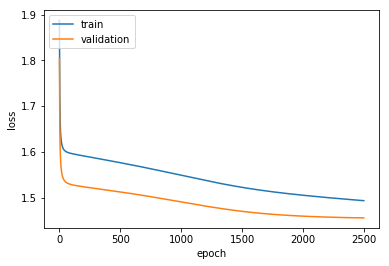

In [222]:
#without half time details loss
plt.plot(without_half_time_details_history.history['loss'])
plt.plot(without_half_time_details_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

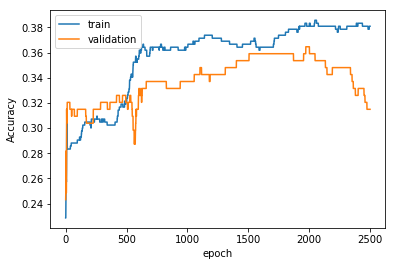

In [223]:
#without halftime details accuracy
plt.plot(without_half_time_details_history.history['acc'])
plt.plot(without_half_time_details_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [112]:
#save the model for prediction
without_halftime_details_model_json = without_half_time_details_model.to_json()
with open("without_halftime_details_model.json", "w") as json_file:
    json_file.write(without_halftime_details_model_json)
# serialize weights to HDF5
without_half_time_details_model.save_weights("without_halftime_details_model.h5")
print("Saved model to disk")

Saved model to disk


In [113]:
# load without halftime json and create model
json_file = open('without_halftime_details_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("without_halftime_details_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
score = loaded_model.evaluate(Xtest_without_halftime, Ytest_without_halftime, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Loaded model from disk
Test loss: 1.7885873552228584
Test accuracy: 26.229508221149445


In [227]:

# model with half time statistics
X = fixtures[[0,1,2,3,4,5,6,7]]
Xtrain = X.ix[:600,]
Y = fixtures[[8]]
Ytrain = to_categorical(Y.ix[:600,], num_classes=7)

#scaling the data 
Xtrain = preprocessing.scale(Xtrain)


Xtest_with_halftime = X.ix[600:,]
Ytest_with_halftime = to_categorical(Y.ix[600:,], num_classes=7)


/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/home/constant/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [231]:
model_with_half_time_statistics = Sequential()
model_with_half_time_statistics.add(Dense(500, input_dim=8, activation='relu'))
model_with_half_time_statistics.add(Dense(300, activation='relu'))
model_with_half_time_statistics.add(Dense(700, activation='relu'))
model_with_half_time_statistics.add(Dense(7, activation='softmax'))
model_with_half_time_statistics.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [232]:
model_with_half_time_statistics_history = model_with_half_time_statistics.fit(Xtrain, Ytrain, epochs=2000, batch_size=500, verbose=2, validation_split=0.3)

Train on 420 samples, validate on 181 samples
Epoch 1/2000
 - 2s - loss: 1.9485 - acc: 0.1095 - val_loss: 1.9446 - val_acc: 0.1105
Epoch 2/2000
 - 0s - loss: 1.9447 - acc: 0.1167 - val_loss: 1.9408 - val_acc: 0.1160
Epoch 3/2000
 - 0s - loss: 1.9408 - acc: 0.1262 - val_loss: 1.9371 - val_acc: 0.1271
Epoch 4/2000
 - 0s - loss: 1.9371 - acc: 0.1333 - val_loss: 1.9334 - val_acc: 0.1381
Epoch 5/2000
 - 0s - loss: 1.9334 - acc: 0.1500 - val_loss: 1.9298 - val_acc: 0.1657
Epoch 6/2000
 - 0s - loss: 1.9297 - acc: 0.1643 - val_loss: 1.9262 - val_acc: 0.2155
Epoch 7/2000
 - 0s - loss: 1.9260 - acc: 0.1881 - val_loss: 1.9226 - val_acc: 0.2376
Epoch 8/2000
 - 0s - loss: 1.9224 - acc: 0.2048 - val_loss: 1.9191 - val_acc: 0.2486
Epoch 9/2000
 - 0s - loss: 1.9188 - acc: 0.2333 - val_loss: 1.9156 - val_acc: 0.2818
Epoch 10/2000
 - 0s - loss: 1.9153 - acc: 0.2452 - val_loss: 1.9121 - val_acc: 0.2873
Epoch 11/2000
 - 0s - loss: 1.9118 - acc: 0.2643 - val_loss: 1.9086 - val_acc: 0.2983
Epoch 12/2000
 - 

Epoch 96/2000
 - 0s - loss: 1.6824 - acc: 0.3833 - val_loss: 1.6752 - val_acc: 0.4033
Epoch 97/2000
 - 0s - loss: 1.6803 - acc: 0.3881 - val_loss: 1.6730 - val_acc: 0.4088
Epoch 98/2000
 - 0s - loss: 1.6783 - acc: 0.3905 - val_loss: 1.6708 - val_acc: 0.4088
Epoch 99/2000
 - 0s - loss: 1.6762 - acc: 0.3881 - val_loss: 1.6686 - val_acc: 0.4088
Epoch 100/2000
 - 0s - loss: 1.6741 - acc: 0.3881 - val_loss: 1.6664 - val_acc: 0.4033
Epoch 101/2000
 - 0s - loss: 1.6721 - acc: 0.3905 - val_loss: 1.6642 - val_acc: 0.4033
Epoch 102/2000
 - 0s - loss: 1.6700 - acc: 0.3905 - val_loss: 1.6620 - val_acc: 0.4033
Epoch 103/2000
 - 0s - loss: 1.6680 - acc: 0.3905 - val_loss: 1.6598 - val_acc: 0.3978
Epoch 104/2000
 - 0s - loss: 1.6660 - acc: 0.3952 - val_loss: 1.6576 - val_acc: 0.3978
Epoch 105/2000
 - 0s - loss: 1.6640 - acc: 0.4000 - val_loss: 1.6555 - val_acc: 0.3978
Epoch 106/2000
 - 0s - loss: 1.6620 - acc: 0.4000 - val_loss: 1.6534 - val_acc: 0.3978
Epoch 107/2000
 - 0s - loss: 1.6600 - acc: 0.40

Epoch 191/2000
 - 0s - loss: 1.5277 - acc: 0.4310 - val_loss: 1.5070 - val_acc: 0.4475
Epoch 192/2000
 - 0s - loss: 1.5265 - acc: 0.4310 - val_loss: 1.5057 - val_acc: 0.4420
Epoch 193/2000
 - 0s - loss: 1.5253 - acc: 0.4333 - val_loss: 1.5043 - val_acc: 0.4420
Epoch 194/2000
 - 0s - loss: 1.5240 - acc: 0.4310 - val_loss: 1.5030 - val_acc: 0.4420
Epoch 195/2000
 - 0s - loss: 1.5228 - acc: 0.4310 - val_loss: 1.5017 - val_acc: 0.4420
Epoch 196/2000
 - 0s - loss: 1.5216 - acc: 0.4310 - val_loss: 1.5004 - val_acc: 0.4420
Epoch 197/2000
 - 0s - loss: 1.5204 - acc: 0.4310 - val_loss: 1.4990 - val_acc: 0.4365
Epoch 198/2000
 - 0s - loss: 1.5192 - acc: 0.4333 - val_loss: 1.4977 - val_acc: 0.4365
Epoch 199/2000
 - 0s - loss: 1.5180 - acc: 0.4357 - val_loss: 1.4964 - val_acc: 0.4365
Epoch 200/2000
 - 0s - loss: 1.5168 - acc: 0.4333 - val_loss: 1.4952 - val_acc: 0.4365
Epoch 201/2000
 - 0s - loss: 1.5156 - acc: 0.4333 - val_loss: 1.4939 - val_acc: 0.4365
Epoch 202/2000
 - 0s - loss: 1.5144 - acc: 

 - 0s - loss: 1.4309 - acc: 0.4548 - val_loss: 1.4057 - val_acc: 0.4365
Epoch 286/2000
 - 0s - loss: 1.4300 - acc: 0.4548 - val_loss: 1.4048 - val_acc: 0.4365
Epoch 287/2000
 - 0s - loss: 1.4291 - acc: 0.4548 - val_loss: 1.4039 - val_acc: 0.4309
Epoch 288/2000
 - 0s - loss: 1.4282 - acc: 0.4548 - val_loss: 1.4031 - val_acc: 0.4309
Epoch 289/2000
 - 0s - loss: 1.4274 - acc: 0.4548 - val_loss: 1.4022 - val_acc: 0.4309
Epoch 290/2000
 - 0s - loss: 1.4265 - acc: 0.4548 - val_loss: 1.4014 - val_acc: 0.4309
Epoch 291/2000
 - 0s - loss: 1.4257 - acc: 0.4548 - val_loss: 1.4005 - val_acc: 0.4309
Epoch 292/2000
 - 0s - loss: 1.4248 - acc: 0.4548 - val_loss: 1.3997 - val_acc: 0.4365
Epoch 293/2000
 - 0s - loss: 1.4239 - acc: 0.4571 - val_loss: 1.3988 - val_acc: 0.4365
Epoch 294/2000
 - 0s - loss: 1.4231 - acc: 0.4571 - val_loss: 1.3980 - val_acc: 0.4365
Epoch 295/2000
 - 0s - loss: 1.4222 - acc: 0.4571 - val_loss: 1.3971 - val_acc: 0.4365
Epoch 296/2000
 - 0s - loss: 1.4214 - acc: 0.4571 - val_lo

Epoch 380/2000
 - 0s - loss: 1.3579 - acc: 0.4762 - val_loss: 1.3373 - val_acc: 0.4254
Epoch 381/2000
 - 0s - loss: 1.3572 - acc: 0.4786 - val_loss: 1.3367 - val_acc: 0.4254
Epoch 382/2000
 - 0s - loss: 1.3566 - acc: 0.4810 - val_loss: 1.3361 - val_acc: 0.4309
Epoch 383/2000
 - 0s - loss: 1.3559 - acc: 0.4786 - val_loss: 1.3356 - val_acc: 0.4309
Epoch 384/2000
 - 0s - loss: 1.3552 - acc: 0.4762 - val_loss: 1.3350 - val_acc: 0.4309
Epoch 385/2000
 - 0s - loss: 1.3546 - acc: 0.4786 - val_loss: 1.3344 - val_acc: 0.4309
Epoch 386/2000
 - 0s - loss: 1.3539 - acc: 0.4762 - val_loss: 1.3338 - val_acc: 0.4254
Epoch 387/2000
 - 0s - loss: 1.3533 - acc: 0.4762 - val_loss: 1.3333 - val_acc: 0.4309
Epoch 388/2000
 - 0s - loss: 1.3526 - acc: 0.4762 - val_loss: 1.3327 - val_acc: 0.4254
Epoch 389/2000
 - 0s - loss: 1.3520 - acc: 0.4762 - val_loss: 1.3321 - val_acc: 0.4309
Epoch 390/2000
 - 0s - loss: 1.3513 - acc: 0.4762 - val_loss: 1.3316 - val_acc: 0.4254
Epoch 391/2000
 - 0s - loss: 1.3507 - acc: 

Epoch 475/2000
 - 0s - loss: 1.3025 - acc: 0.5000 - val_loss: 1.2923 - val_acc: 0.4199
Epoch 476/2000
 - 0s - loss: 1.3020 - acc: 0.4976 - val_loss: 1.2920 - val_acc: 0.4199
Epoch 477/2000
 - 0s - loss: 1.3015 - acc: 0.4976 - val_loss: 1.2916 - val_acc: 0.4199
Epoch 478/2000
 - 0s - loss: 1.3010 - acc: 0.4976 - val_loss: 1.2912 - val_acc: 0.4254
Epoch 479/2000
 - 0s - loss: 1.3005 - acc: 0.4976 - val_loss: 1.2909 - val_acc: 0.4254
Epoch 480/2000
 - 0s - loss: 1.3000 - acc: 0.4976 - val_loss: 1.2905 - val_acc: 0.4254
Epoch 481/2000
 - 0s - loss: 1.2995 - acc: 0.5000 - val_loss: 1.2901 - val_acc: 0.4199
Epoch 482/2000
 - 0s - loss: 1.2990 - acc: 0.5000 - val_loss: 1.2898 - val_acc: 0.4199
Epoch 483/2000
 - 0s - loss: 1.2985 - acc: 0.5000 - val_loss: 1.2894 - val_acc: 0.4254
Epoch 484/2000
 - 0s - loss: 1.2980 - acc: 0.5000 - val_loss: 1.2891 - val_acc: 0.4254
Epoch 485/2000
 - 0s - loss: 1.2975 - acc: 0.5000 - val_loss: 1.2887 - val_acc: 0.4254
Epoch 486/2000
 - 0s - loss: 1.2970 - acc: 

 - 0s - loss: 1.2615 - acc: 0.5048 - val_loss: 1.2649 - val_acc: 0.4254
Epoch 570/2000
 - 0s - loss: 1.2611 - acc: 0.5048 - val_loss: 1.2647 - val_acc: 0.4309
Epoch 571/2000
 - 0s - loss: 1.2608 - acc: 0.5048 - val_loss: 1.2645 - val_acc: 0.4309
Epoch 572/2000
 - 0s - loss: 1.2604 - acc: 0.5048 - val_loss: 1.2643 - val_acc: 0.4309
Epoch 573/2000
 - 0s - loss: 1.2600 - acc: 0.5048 - val_loss: 1.2641 - val_acc: 0.4309
Epoch 574/2000
 - 0s - loss: 1.2596 - acc: 0.5048 - val_loss: 1.2639 - val_acc: 0.4309
Epoch 575/2000
 - 0s - loss: 1.2593 - acc: 0.5048 - val_loss: 1.2636 - val_acc: 0.4309
Epoch 576/2000
 - 0s - loss: 1.2589 - acc: 0.5048 - val_loss: 1.2634 - val_acc: 0.4309
Epoch 577/2000
 - 0s - loss: 1.2585 - acc: 0.5048 - val_loss: 1.2632 - val_acc: 0.4309
Epoch 578/2000
 - 0s - loss: 1.2582 - acc: 0.5048 - val_loss: 1.2630 - val_acc: 0.4309
Epoch 579/2000
 - 0s - loss: 1.2578 - acc: 0.5048 - val_loss: 1.2628 - val_acc: 0.4309
Epoch 580/2000
 - 0s - loss: 1.2574 - acc: 0.5048 - val_lo

Epoch 664/2000
 - 0s - loss: 1.2303 - acc: 0.5024 - val_loss: 1.2484 - val_acc: 0.4309
Epoch 665/2000
 - 0s - loss: 1.2300 - acc: 0.5024 - val_loss: 1.2483 - val_acc: 0.4309
Epoch 666/2000
 - 0s - loss: 1.2297 - acc: 0.5024 - val_loss: 1.2482 - val_acc: 0.4309
Epoch 667/2000
 - 0s - loss: 1.2294 - acc: 0.5024 - val_loss: 1.2480 - val_acc: 0.4309
Epoch 668/2000
 - 0s - loss: 1.2291 - acc: 0.5024 - val_loss: 1.2479 - val_acc: 0.4309
Epoch 669/2000
 - 0s - loss: 1.2289 - acc: 0.5024 - val_loss: 1.2478 - val_acc: 0.4309
Epoch 670/2000
 - 0s - loss: 1.2286 - acc: 0.5024 - val_loss: 1.2476 - val_acc: 0.4309
Epoch 671/2000
 - 0s - loss: 1.2283 - acc: 0.5024 - val_loss: 1.2475 - val_acc: 0.4309
Epoch 672/2000
 - 0s - loss: 1.2280 - acc: 0.5024 - val_loss: 1.2474 - val_acc: 0.4309
Epoch 673/2000
 - 0s - loss: 1.2277 - acc: 0.5024 - val_loss: 1.2472 - val_acc: 0.4309
Epoch 674/2000
 - 0s - loss: 1.2275 - acc: 0.5000 - val_loss: 1.2471 - val_acc: 0.4309
Epoch 675/2000
 - 0s - loss: 1.2272 - acc: 

 - 0s - loss: 1.2061 - acc: 0.5024 - val_loss: 1.2382 - val_acc: 0.4309
Epoch 759/2000
 - 0s - loss: 1.2059 - acc: 0.5048 - val_loss: 1.2381 - val_acc: 0.4309
Epoch 760/2000
 - 0s - loss: 1.2056 - acc: 0.5048 - val_loss: 1.2380 - val_acc: 0.4309
Epoch 761/2000
 - 0s - loss: 1.2054 - acc: 0.5071 - val_loss: 1.2380 - val_acc: 0.4309
Epoch 762/2000
 - 0s - loss: 1.2052 - acc: 0.5071 - val_loss: 1.2379 - val_acc: 0.4309
Epoch 763/2000
 - 0s - loss: 1.2050 - acc: 0.5071 - val_loss: 1.2378 - val_acc: 0.4309
Epoch 764/2000
 - 0s - loss: 1.2047 - acc: 0.5071 - val_loss: 1.2377 - val_acc: 0.4309
Epoch 765/2000
 - 0s - loss: 1.2045 - acc: 0.5071 - val_loss: 1.2376 - val_acc: 0.4309
Epoch 766/2000
 - 0s - loss: 1.2043 - acc: 0.5071 - val_loss: 1.2375 - val_acc: 0.4309
Epoch 767/2000
 - 0s - loss: 1.2040 - acc: 0.5071 - val_loss: 1.2374 - val_acc: 0.4309
Epoch 768/2000
 - 0s - loss: 1.2038 - acc: 0.5071 - val_loss: 1.2374 - val_acc: 0.4309
Epoch 769/2000
 - 0s - loss: 1.2036 - acc: 0.5071 - val_lo

Epoch 853/2000
 - 0s - loss: 1.1860 - acc: 0.5048 - val_loss: 1.2316 - val_acc: 0.4365
Epoch 854/2000
 - 0s - loss: 1.1859 - acc: 0.5048 - val_loss: 1.2315 - val_acc: 0.4365
Epoch 855/2000
 - 0s - loss: 1.1857 - acc: 0.5048 - val_loss: 1.2314 - val_acc: 0.4365
Epoch 856/2000
 - 0s - loss: 1.1855 - acc: 0.5048 - val_loss: 1.2314 - val_acc: 0.4365
Epoch 857/2000
 - 0s - loss: 1.1853 - acc: 0.5048 - val_loss: 1.2313 - val_acc: 0.4365
Epoch 858/2000
 - 0s - loss: 1.1851 - acc: 0.5048 - val_loss: 1.2313 - val_acc: 0.4365
Epoch 859/2000
 - 0s - loss: 1.1849 - acc: 0.5048 - val_loss: 1.2312 - val_acc: 0.4365
Epoch 860/2000
 - 0s - loss: 1.1847 - acc: 0.5048 - val_loss: 1.2312 - val_acc: 0.4365
Epoch 861/2000
 - 0s - loss: 1.1845 - acc: 0.5048 - val_loss: 1.2311 - val_acc: 0.4365
Epoch 862/2000
 - 0s - loss: 1.1843 - acc: 0.5024 - val_loss: 1.2311 - val_acc: 0.4365
Epoch 863/2000
 - 0s - loss: 1.1841 - acc: 0.5024 - val_loss: 1.2310 - val_acc: 0.4365
Epoch 864/2000
 - 0s - loss: 1.1839 - acc: 

 - 0s - loss: 1.1689 - acc: 0.5095 - val_loss: 1.2271 - val_acc: 0.4309
Epoch 948/2000
 - 0s - loss: 1.1687 - acc: 0.5095 - val_loss: 1.2270 - val_acc: 0.4309
Epoch 949/2000
 - 0s - loss: 1.1686 - acc: 0.5095 - val_loss: 1.2270 - val_acc: 0.4309
Epoch 950/2000
 - 0s - loss: 1.1684 - acc: 0.5095 - val_loss: 1.2270 - val_acc: 0.4309
Epoch 951/2000
 - 0s - loss: 1.1682 - acc: 0.5095 - val_loss: 1.2269 - val_acc: 0.4309
Epoch 952/2000
 - 0s - loss: 1.1680 - acc: 0.5095 - val_loss: 1.2269 - val_acc: 0.4309
Epoch 953/2000
 - 0s - loss: 1.1679 - acc: 0.5095 - val_loss: 1.2268 - val_acc: 0.4309
Epoch 954/2000
 - 0s - loss: 1.1677 - acc: 0.5095 - val_loss: 1.2268 - val_acc: 0.4309
Epoch 955/2000
 - 0s - loss: 1.1675 - acc: 0.5095 - val_loss: 1.2268 - val_acc: 0.4309
Epoch 956/2000
 - 0s - loss: 1.1674 - acc: 0.5095 - val_loss: 1.2267 - val_acc: 0.4309
Epoch 957/2000
 - 0s - loss: 1.1672 - acc: 0.5095 - val_loss: 1.2267 - val_acc: 0.4309
Epoch 958/2000
 - 0s - loss: 1.1670 - acc: 0.5095 - val_lo

Epoch 1041/2000
 - 0s - loss: 1.1539 - acc: 0.5214 - val_loss: 1.2238 - val_acc: 0.4254
Epoch 1042/2000
 - 0s - loss: 1.1537 - acc: 0.5214 - val_loss: 1.2238 - val_acc: 0.4254
Epoch 1043/2000
 - 0s - loss: 1.1536 - acc: 0.5214 - val_loss: 1.2238 - val_acc: 0.4254
Epoch 1044/2000
 - 0s - loss: 1.1534 - acc: 0.5214 - val_loss: 1.2238 - val_acc: 0.4254
Epoch 1045/2000
 - 0s - loss: 1.1533 - acc: 0.5214 - val_loss: 1.2237 - val_acc: 0.4309
Epoch 1046/2000
 - 0s - loss: 1.1531 - acc: 0.5214 - val_loss: 1.2237 - val_acc: 0.4309
Epoch 1047/2000
 - 0s - loss: 1.1530 - acc: 0.5214 - val_loss: 1.2237 - val_acc: 0.4309
Epoch 1048/2000
 - 0s - loss: 1.1528 - acc: 0.5214 - val_loss: 1.2237 - val_acc: 0.4309
Epoch 1049/2000
 - 0s - loss: 1.1527 - acc: 0.5214 - val_loss: 1.2236 - val_acc: 0.4309
Epoch 1050/2000
 - 0s - loss: 1.1525 - acc: 0.5214 - val_loss: 1.2236 - val_acc: 0.4309
Epoch 1051/2000
 - 0s - loss: 1.1524 - acc: 0.5214 - val_loss: 1.2236 - val_acc: 0.4309
Epoch 1052/2000
 - 0s - loss: 1.

 - 0s - loss: 1.1405 - acc: 0.5286 - val_loss: 1.2218 - val_acc: 0.4365
Epoch 1135/2000
 - 0s - loss: 1.1403 - acc: 0.5286 - val_loss: 1.2218 - val_acc: 0.4365
Epoch 1136/2000
 - 0s - loss: 1.1402 - acc: 0.5286 - val_loss: 1.2217 - val_acc: 0.4365
Epoch 1137/2000
 - 0s - loss: 1.1400 - acc: 0.5286 - val_loss: 1.2217 - val_acc: 0.4365
Epoch 1138/2000
 - 0s - loss: 1.1399 - acc: 0.5286 - val_loss: 1.2217 - val_acc: 0.4365
Epoch 1139/2000
 - 0s - loss: 1.1398 - acc: 0.5333 - val_loss: 1.2217 - val_acc: 0.4365
Epoch 1140/2000
 - 0s - loss: 1.1396 - acc: 0.5333 - val_loss: 1.2217 - val_acc: 0.4365
Epoch 1141/2000
 - 0s - loss: 1.1395 - acc: 0.5333 - val_loss: 1.2217 - val_acc: 0.4365
Epoch 1142/2000
 - 0s - loss: 1.1394 - acc: 0.5333 - val_loss: 1.2216 - val_acc: 0.4365
Epoch 1143/2000
 - 0s - loss: 1.1392 - acc: 0.5333 - val_loss: 1.2216 - val_acc: 0.4365
Epoch 1144/2000
 - 0s - loss: 1.1391 - acc: 0.5333 - val_loss: 1.2216 - val_acc: 0.4365
Epoch 1145/2000
 - 0s - loss: 1.1390 - acc: 0.53

Epoch 1228/2000
 - 0s - loss: 1.1281 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1229/2000
 - 0s - loss: 1.1279 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1230/2000
 - 0s - loss: 1.1278 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1231/2000
 - 0s - loss: 1.1277 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1232/2000
 - 0s - loss: 1.1276 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1233/2000
 - 0s - loss: 1.1274 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1234/2000
 - 0s - loss: 1.1273 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1235/2000
 - 0s - loss: 1.1272 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1236/2000
 - 0s - loss: 1.1271 - acc: 0.5357 - val_loss: 1.2204 - val_acc: 0.4365
Epoch 1237/2000
 - 0s - loss: 1.1269 - acc: 0.5357 - val_loss: 1.2203 - val_acc: 0.4365
Epoch 1238/2000
 - 0s - loss: 1.1268 - acc: 0.5357 - val_loss: 1.2203 - val_acc: 0.4365
Epoch 1239/2000
 - 0s - loss: 1.

 - 0s - loss: 1.1167 - acc: 0.5381 - val_loss: 1.2197 - val_acc: 0.4365
Epoch 1322/2000
 - 0s - loss: 1.1165 - acc: 0.5381 - val_loss: 1.2197 - val_acc: 0.4365
Epoch 1323/2000
 - 0s - loss: 1.1164 - acc: 0.5381 - val_loss: 1.2197 - val_acc: 0.4365
Epoch 1324/2000
 - 0s - loss: 1.1163 - acc: 0.5381 - val_loss: 1.2197 - val_acc: 0.4365
Epoch 1325/2000
 - 0s - loss: 1.1162 - acc: 0.5381 - val_loss: 1.2197 - val_acc: 0.4365
Epoch 1326/2000
 - 0s - loss: 1.1161 - acc: 0.5381 - val_loss: 1.2196 - val_acc: 0.4365
Epoch 1327/2000
 - 0s - loss: 1.1159 - acc: 0.5381 - val_loss: 1.2196 - val_acc: 0.4365
Epoch 1328/2000
 - 0s - loss: 1.1158 - acc: 0.5381 - val_loss: 1.2196 - val_acc: 0.4365
Epoch 1329/2000
 - 0s - loss: 1.1157 - acc: 0.5381 - val_loss: 1.2196 - val_acc: 0.4365
Epoch 1330/2000
 - 0s - loss: 1.1156 - acc: 0.5381 - val_loss: 1.2196 - val_acc: 0.4365
Epoch 1331/2000
 - 0s - loss: 1.1155 - acc: 0.5381 - val_loss: 1.2196 - val_acc: 0.4365
Epoch 1332/2000
 - 0s - loss: 1.1153 - acc: 0.53

Epoch 1415/2000
 - 0s - loss: 1.1057 - acc: 0.5429 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1416/2000
 - 0s - loss: 1.1056 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1417/2000
 - 0s - loss: 1.1055 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1418/2000
 - 0s - loss: 1.1053 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1419/2000
 - 0s - loss: 1.1052 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1420/2000
 - 0s - loss: 1.1051 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1421/2000
 - 0s - loss: 1.1050 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1422/2000
 - 0s - loss: 1.1049 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1423/2000
 - 0s - loss: 1.1048 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1424/2000
 - 0s - loss: 1.1047 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1425/2000
 - 0s - loss: 1.1046 - acc: 0.5452 - val_loss: 1.2191 - val_acc: 0.4475
Epoch 1426/2000
 - 0s - loss: 1.

 - 0s - loss: 1.0955 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1509/2000
 - 0s - loss: 1.0954 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1510/2000
 - 0s - loss: 1.0953 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1511/2000
 - 0s - loss: 1.0952 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1512/2000
 - 0s - loss: 1.0951 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1513/2000
 - 0s - loss: 1.0949 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1514/2000
 - 0s - loss: 1.0948 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1515/2000
 - 0s - loss: 1.0947 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1516/2000
 - 0s - loss: 1.0946 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1517/2000
 - 0s - loss: 1.0945 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1518/2000
 - 0s - loss: 1.0944 - acc: 0.5500 - val_loss: 1.2190 - val_acc: 0.4530
Epoch 1519/2000
 - 0s - loss: 1.0943 - acc: 0.55

Epoch 1602/2000
 - 0s - loss: 1.0857 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1603/2000
 - 0s - loss: 1.0856 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1604/2000
 - 0s - loss: 1.0855 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1605/2000
 - 0s - loss: 1.0854 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1606/2000
 - 0s - loss: 1.0853 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1607/2000
 - 0s - loss: 1.0852 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1608/2000
 - 0s - loss: 1.0851 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1609/2000
 - 0s - loss: 1.0850 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1610/2000
 - 0s - loss: 1.0849 - acc: 0.5571 - val_loss: 1.2193 - val_acc: 0.4696
Epoch 1611/2000
 - 0s - loss: 1.0848 - acc: 0.5571 - val_loss: 1.2194 - val_acc: 0.4696
Epoch 1612/2000
 - 0s - loss: 1.0847 - acc: 0.5571 - val_loss: 1.2194 - val_acc: 0.4696
Epoch 1613/2000
 - 0s - loss: 1.

 - 0s - loss: 1.0765 - acc: 0.5548 - val_loss: 1.2198 - val_acc: 0.4751
Epoch 1696/2000
 - 0s - loss: 1.0764 - acc: 0.5548 - val_loss: 1.2198 - val_acc: 0.4751
Epoch 1697/2000
 - 0s - loss: 1.0763 - acc: 0.5548 - val_loss: 1.2198 - val_acc: 0.4751
Epoch 1698/2000
 - 0s - loss: 1.0762 - acc: 0.5548 - val_loss: 1.2198 - val_acc: 0.4751
Epoch 1699/2000
 - 0s - loss: 1.0761 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1700/2000
 - 0s - loss: 1.0760 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1701/2000
 - 0s - loss: 1.0759 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1702/2000
 - 0s - loss: 1.0758 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1703/2000
 - 0s - loss: 1.0757 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1704/2000
 - 0s - loss: 1.0756 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1705/2000
 - 0s - loss: 1.0756 - acc: 0.5548 - val_loss: 1.2199 - val_acc: 0.4751
Epoch 1706/2000
 - 0s - loss: 1.0755 - acc: 0.55

Epoch 1789/2000
 - 0s - loss: 1.0676 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1790/2000
 - 0s - loss: 1.0675 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1791/2000
 - 0s - loss: 1.0675 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1792/2000
 - 0s - loss: 1.0674 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1793/2000
 - 0s - loss: 1.0673 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1794/2000
 - 0s - loss: 1.0672 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1795/2000
 - 0s - loss: 1.0671 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1796/2000
 - 0s - loss: 1.0670 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4751
Epoch 1797/2000
 - 0s - loss: 1.0669 - acc: 0.5571 - val_loss: 1.2206 - val_acc: 0.4696
Epoch 1798/2000
 - 0s - loss: 1.0668 - acc: 0.5571 - val_loss: 1.2207 - val_acc: 0.4696
Epoch 1799/2000
 - 0s - loss: 1.0667 - acc: 0.5571 - val_loss: 1.2207 - val_acc: 0.4696
Epoch 1800/2000
 - 0s - loss: 1.

 - 0s - loss: 1.0591 - acc: 0.5548 - val_loss: 1.2214 - val_acc: 0.4696
Epoch 1883/2000
 - 0s - loss: 1.0590 - acc: 0.5548 - val_loss: 1.2214 - val_acc: 0.4696
Epoch 1884/2000
 - 0s - loss: 1.0590 - acc: 0.5548 - val_loss: 1.2214 - val_acc: 0.4696
Epoch 1885/2000
 - 0s - loss: 1.0589 - acc: 0.5548 - val_loss: 1.2214 - val_acc: 0.4696
Epoch 1886/2000
 - 0s - loss: 1.0588 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1887/2000
 - 0s - loss: 1.0587 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1888/2000
 - 0s - loss: 1.0586 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1889/2000
 - 0s - loss: 1.0585 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1890/2000
 - 0s - loss: 1.0584 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1891/2000
 - 0s - loss: 1.0583 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1892/2000
 - 0s - loss: 1.0582 - acc: 0.5548 - val_loss: 1.2215 - val_acc: 0.4696
Epoch 1893/2000
 - 0s - loss: 1.0581 - acc: 0.55

Epoch 1976/2000
 - 0s - loss: 1.0508 - acc: 0.5524 - val_loss: 1.2224 - val_acc: 0.4586
Epoch 1977/2000
 - 0s - loss: 1.0507 - acc: 0.5524 - val_loss: 1.2224 - val_acc: 0.4586
Epoch 1978/2000
 - 0s - loss: 1.0506 - acc: 0.5548 - val_loss: 1.2224 - val_acc: 0.4586
Epoch 1979/2000
 - 0s - loss: 1.0506 - acc: 0.5548 - val_loss: 1.2224 - val_acc: 0.4586
Epoch 1980/2000
 - 0s - loss: 1.0505 - acc: 0.5548 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1981/2000
 - 0s - loss: 1.0504 - acc: 0.5548 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1982/2000
 - 0s - loss: 1.0503 - acc: 0.5571 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1983/2000
 - 0s - loss: 1.0502 - acc: 0.5571 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1984/2000
 - 0s - loss: 1.0501 - acc: 0.5571 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1985/2000
 - 0s - loss: 1.0500 - acc: 0.5571 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1986/2000
 - 0s - loss: 1.0500 - acc: 0.5595 - val_loss: 1.2225 - val_acc: 0.4586
Epoch 1987/2000
 - 0s - loss: 1.

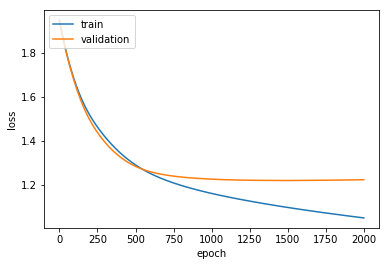

In [233]:
plt.plot(model_with_half_time_statistics_history.history['loss'])
plt.plot(model_with_half_time_statistics_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

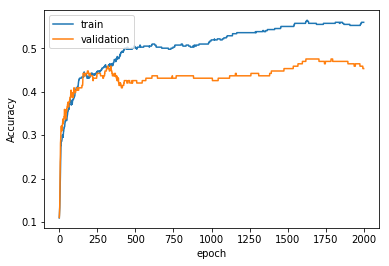

In [234]:
plt.plot(model_with_half_time_statistics_history.history['acc'])
plt.plot(model_with_half_time_statistics_history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [235]:
#save the model for prediction
model_with_half_time_statistics_json = model_with_half_time_statistics.to_json()
with open("with_halftime_details_model.json", "w") as json_file:
    json_file.write(model_with_half_time_statistics_json)
# serialize weights to HDF5
model_with_half_time_statistics.save_weights("with_halftime_details_model.h5")
print("Saved model to disk")

Saved model to disk


In [236]:
# load with halftime json and create model
json_file = open('with_halftime_details_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("with_halftime_details_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
score = loaded_model.evaluate(Xtest_with_halftime, Ytest_with_halftime, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Loaded model from disk
Test loss: 2.6878994449240263
Test accuracy: 33.60655742590545


Loaded model from disk


ValueError: Error when checking target: expected dense_4 to have shape (7,) but got array with shape (1,)